# Multilayer Perceptron (MLP)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt

from utils import evaluate_classification_metrics

In [2]:
data = pd.read_csv('creditcard.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Hint: .get(a, b) is a method of a dictionary that returns the value for key a if it exists, otherwise it returns b. For example, d.get('a', 0) will return d['a'] if 'a' is in d, otherwise it will return 0.

Tokenize the sentences and compute the vocabulary of the exercise

Calculate priors

In [3]:
priors = {}
total_docs = len(y_train)
for value in y_train:
    label = value
    if label not in priors:
        priors[label] = 0
    priors[label] += 1

for label in priors:
    priors[label] /= total_docs

print('Class Priors:', priors)

Class Priors: {np.int64(0): 0.9982707542408216, np.int64(1): 0.001729245759178389}


Calculate the amount of words per class

## Multilayer Perceptron (MLP) for Credit Card Fraud Detection

In [10]:
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
# Create a simple MLP
model = Sequential()

# NN layers
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Calculate class weights to handle imbalanced data
n_samples = len(y_train)
n_classes = len(np.unique(y_train))
class_weights = dict(zip(
    np.unique(y_train),
    n_samples / (n_classes * np.bincount(y_train))
))

# Optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model with class weights
history = model.fit(X_train, y_train, 
                   epochs=8, 
                   validation_split=0.2, 
                   class_weight=class_weights,
                   verbose=1)
print(f"Training Loss: {history.history['loss'][-1]:.4f}", 
      f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f} - Accuracy: {accuracy:.4f}')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8579 - loss: 3.1222 - val_accuracy: 0.9811 - val_loss: 0.0638
Epoch 2/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8815 - loss: 1.7751 - val_accuracy: 0.9770 - val_loss: 0.0762
Epoch 3/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8843 - loss: 2.7211 - val_accuracy: 0.9716 - val_loss: 0.1625
Epoch 4/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8945 - loss: 3.2538 - val_accuracy: 0.9779 - val_loss: 0.1614
Epoch 5/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9161 - loss: 2.9372 - val_accuracy: 0.9567 - val_loss: 0.3146
Epoch 6/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9121 - loss: 3.7991 - val_accuracy: 0.5981 - val_loss: 29.9679
Epoch 7/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9009 - loss: 3.3148 - val_accuracy: 0.9585 - val_loss: 0.2460
Epoch 8/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9228 - loss: 1.8973 -

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step
Confusion Matrix:
[[56851    13]
 [   23    75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



{'Confusion Matrix': [np.int64(56864), np.int64(0), np.int64(94), np.int64(4)],
 'Accuracy': np.float64(0.9983497770443454),
 'Precision': np.float64(1.0),
 'Recall': np.float64(0.04081632653061224),
 'Specificity': np.float64(1.0),
 'F1 Score': np.float64(0.07843137254901959)}

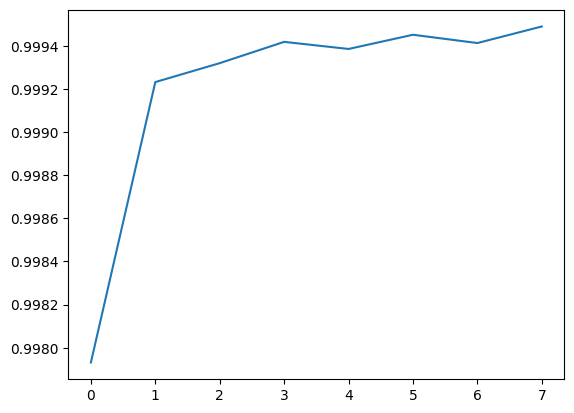

In [9]:
# Test the model and evaluate performance
y_pred = model.predict(X_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])

evaluate_classification_metrics(y_test, y_pred, 1)